In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Part A: Understanding The Data

## Generate the data

The `make_moons()` function creates our superhero data.
This function returns `X`, an array with 6,000 rows and 2 columns: extroversion and curiousity.
The function also returns `y`, another 6,000 row array but with only one column for the name of the superhero: 0=Batman and 1=Iron man.

We split up the data into a training set and a testing set so that we can evaluate our models on data that hasn't been seen.
This is achieved using the `train_test_split()` function.
The results of the split are printed below the cell.

<div class="alert alert-block alert-info">
    <b>Question 1</b> What percentage of the 6,000 data points has been set aside for testing?
</div>

In [2]:
# Create the superhero data
X,y = make_moons(n_samples=6000, noise=0.08, random_state=2023)
# Set some testing data aside so we can test our models on unseen data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# Print some information about the data
print(f"The training set has {X_train.shape[0]} rows. Here are the first three:")
print(X_train[:3,:])
print(f"\nThe testing set has {X_test.shape[0]} rows. Here are the first three:")
print(X_test[:3,:])

The training set has 4500 rows. Here are the first three:
[[ 0.93120021 -0.43568942]
 [-0.45699653  0.91427442]
 [ 1.97859436  0.37479133]]

The testing set has 1500 rows. Here are the first three:
[[ 0.29916964  0.05609256]
 [ 0.0494739  -0.0585662 ]
 [ 2.04106049  0.49372746]]


## Visualize the data
Here is a quick visualization of the the data.
Extroversion is plotted on the x axis and curiosity is plotted on the y axis.
The super hero is indicated by the color of the data point and the shape indicates whether it is for testing or training.

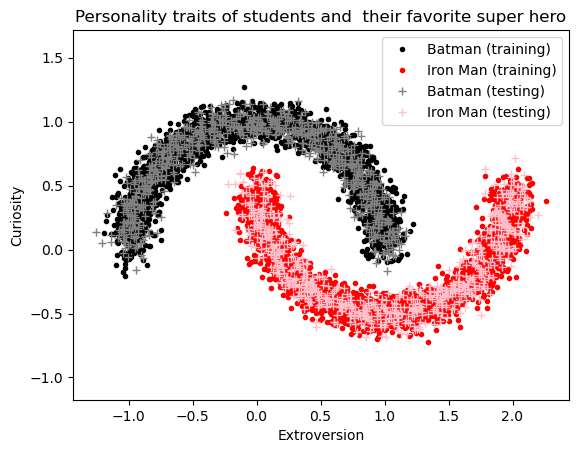

In [3]:
# Make the figure
plt.figure()
# Plot training data
plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], 'k.', label='Batman (training)')
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], 'r.', label='Iron Man (training)')
# Plot testing data
plt.plot(X_test[y_test==0, 0], X_test[y_test==0, 1], '+', c='gray', label='Batman (testing)')
plt.plot(X_test[y_test==1, 0], X_test[y_test==1, 1], '+', c='pink', label='Iron Man (testing)')
# Title and axes labels
plt.title("Personality traits of students and  their favorite super hero")
plt.xlabel('Extroversion')
plt.ylabel('Curiosity')
plt.axis('equal')
plt.legend()
# Display the figure
plt.show()

# Part B: Linear Model

## Train the linear model

Here we try to draw a line to separate the data into two different categories.
This is called a logistic regression and it draws a straight line such that every point above the line is Batman and every point below the line is Iron Man.

<div class="alert alert-block alert-info">
    <b>Question 2</b> How accurate is the linear model?
</div>

In [4]:
# Tell the computer we want a linear model
lin_model = linear_model.LogisticRegression()
# Use the training data to fit the model
lin_model.fit(X_train, y_train)
# Use the testing data to determine the accuracy of the model
lin_acc = lin_model.score(X_test, y_test)
print(f"The accuracy of the model is {lin_acc:.2%}")

The accuracy of the model is 88.13%


## Visualize the model results

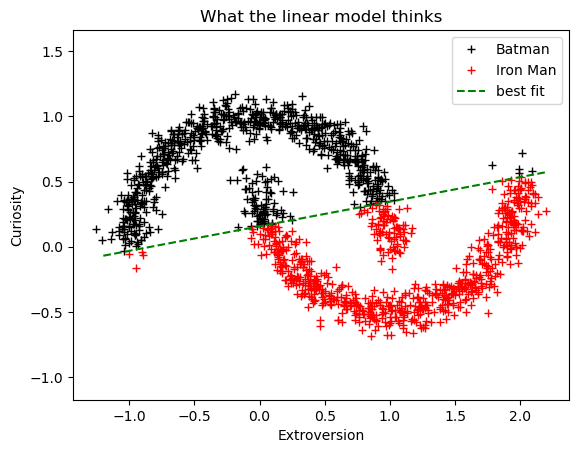

In [5]:
# Make a figure
plt.figure()
# Determine which superhero the model assigns to each point
ys = lin_model.predict(X_test)
# Plot the results of the model
plt.plot(X_test[ys==0, 0], X_test[ys==0, 1], 'k+', label='Batman')
plt.plot(X_test[ys==1, 0], X_test[ys==1, 1], 'r+', label='Iron Man')
# Convert the line equation from standard form: Ax + By = C
# to slope-intercept form: y = mx + b
A, B = lin_model.coef_[0,:]
m = A / B
b = lin_model.intercept_ / B
# Plot the line
x_line = np.linspace(-1.2,2.2,100)
y_line = x_line * -m - b
plt.plot(x_line, y_line, 'g--', label='best fit')
# Label the title and axes
plt.title("What the linear model thinks")
plt.xlabel('Extroversion')
plt.ylabel('Curiosity')
plt.axis('equal')
plt.legend()
plt.show()

# Part C: Decision Tree Classifier

## Train the decision tree classifier
Here's an exampe of a Decision Tree Classifier, just like the one we used on the micro:bit example.
In this case there are only two inputs: Extroversion and Curiosity.

<div class="alert alert-block alert-info">
    <b>Question 3</b> How does increasing the number of leaf nodes change the accuracy of the model?
</div>

In [6]:
###################
### CHANGE THIS ###
num_leaf_nodes = 5
###################

# make a decision tree classifier
dtc = DecisionTreeClassifier(max_leaf_nodes=num_leaf_nodes)
# Use the training data to fit the model
dtc.fit(X_train, y_train)
# Determine the accuracy of the model using the test data
dtc_acc = dtc.score(X_test, y_test)
print(f"The accuracy of the model is {dtc_acc:.2%}")

The accuracy of the model is 91.40%


## Visualize the decision tree

We can visualize the decision tree classifier as a series of boxes that each ask a single question.
If the answer is yes, follow the arrow that goes down and to the left.
If the answer is no, follow the arrow that goes down and to the right.
Keep going until there are no more arrows to follow, then look at the "class" to determine the hero preference!

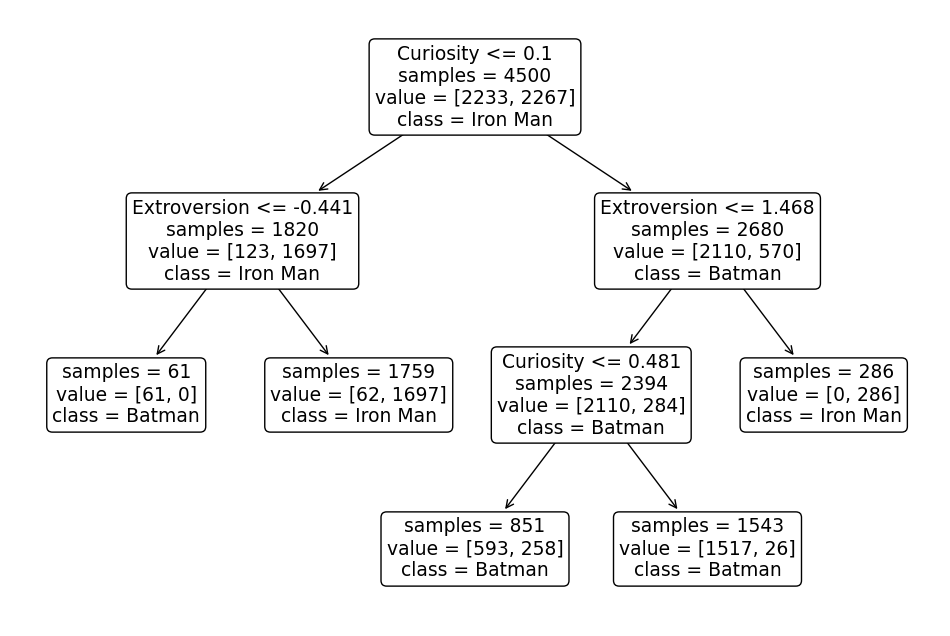

In [7]:
# Make a figure
plt.figure(figsize=(12,8))
plot_tree(dtc, feature_names=['Extroversion', 'Curiosity'],
          class_names=['Batman', 'Iron Man'], impurity=False, rounded=True)
plt.show()

## Visualize the model results

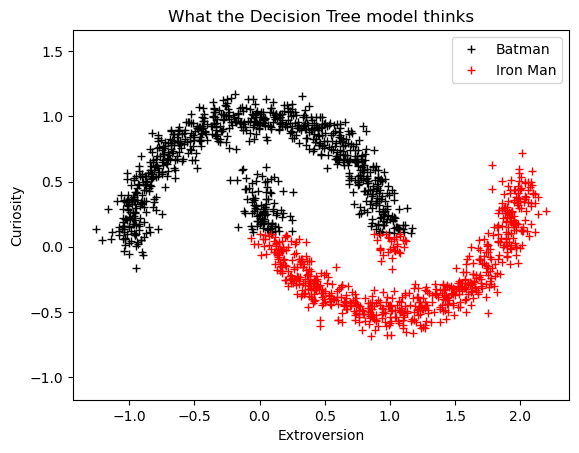

In [8]:
plt.figure()
ys = dtc.predict(X_test)
plt.plot(X_test[ys==0, 0], X_test[ys==0, 1], 'k+', label='Batman')
plt.plot(X_test[ys==1, 0], X_test[ys==1, 1], 'r+', label='Iron Man')
plt.title("What the Decision Tree model thinks")
plt.xlabel('Extroversion')
plt.ylabel('Curiosity')
plt.axis('equal')
plt.legend()
plt.show()

## Neural Network
Here is the same data using a neural network.
Currently, it looks like the figure below.
The two input nodes are Extroversion and Curiosity
Then there is a fully connected layer with 8 nodes.
Another fully connected layer with 4 nodes follows that.
Finally there is a single, fully connected node in the last layer.



In [12]:
###################
### CHANGE THIS ###
layer_1_neurons = 12
layer_2_neurons = 2
###################

nn = tf.keras.Sequential()
nn.add(tf.keras.layers.Dense(layer_1_neurons, input_dim=2, activation='relu'))
nn.add(tf.keras.layers.Dense(layer_2_neurons, activation='relu'))
nn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

nn.compile(loss='binary_crossentropy',
           optimizer=tf.keras.optimizers.SGD(.01, .9),
           metrics=['accuracy'])

In [13]:
nn_results = nn.fit(X_train, y_train.T, epochs=10, validation_data = (X_test, y_test.T))
nn_acc = nn.evaluate(X_test, y_test)[1]
print(f"The accuracy of the model is {nn_acc:.2%}")

Epoch 1/10
141/141 [==============================] - 1s 2ms/step - loss: 0.3881 - accuracy: 0.8498 - val_loss: 0.2465 - val_accuracy: 0.8900
Epoch 2/10
141/141 [==============================] - 0s 2ms/step - loss: 0.2121 - accuracy: 0.8976 - val_loss: 0.2169 - val_accuracy: 0.9087
Epoch 3/10
141/141 [==============================] - 0s 2ms/step - loss: 0.1830 - accuracy: 0.9129 - val_loss: 0.1825 - val_accuracy: 0.9207
Epoch 4/10
141/141 [==============================] - 0s 2ms/step - loss: 0.1334 - accuracy: 0.9436 - val_loss: 0.1163 - val_accuracy: 0.9520
Epoch 5/10
141/141 [==============================] - 0s 2ms/step - loss: 0.0765 - accuracy: 0.9793 - val_loss: 0.0622 - val_accuracy: 0.9793
Epoch 6/10
141/141 [==============================] - 0s 2ms/step - loss: 0.0417 - accuracy: 0.9927 - val_loss: 0.0383 - val_accuracy: 0.9933
Epoch 7/10
141/141 [==============================] - 0s 2ms/step - loss: 0.0260 - accuracy: 0.9960 - val_loss: 0.0253 - val_accuracy: 0.9960
Epoch 

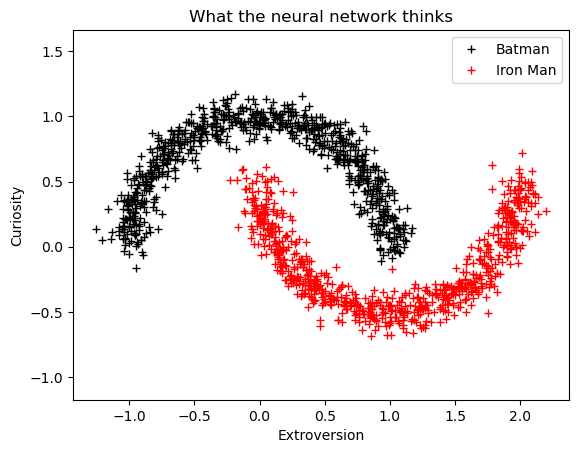

In [14]:
plt.figure()
ys = nn(X_test)[:,0]
plt.plot(X_test[ys<0.5, 0], X_test[ys<0.5, 1], 'k+', label='Batman')
plt.plot(X_test[ys>=0.5, 0], X_test[ys>=0.5, 1], 'r+', label='Iron Man')
plt.title("What the neural network thinks")
plt.xlabel('Extroversion')
plt.ylabel('Curiosity')
plt.axis('equal')
plt.legend()
plt.show()

In [15]:
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                36        
                                                                 
 dense_7 (Dense)             (None, 2)                 26        
                                                                 
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________
